<a href="https://colab.research.google.com/github/ion-ian/MachineLearning_Code/blob/master/CEA_3_Performance_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('/content/SMSSpamCollection', sep = '\t',names = ['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

In [ ]:
!pip install nltk

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
sent = 'Hello friends! How are you?'

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['Hello', 'friends', '!', 'How', 'are', 'you', '?']

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
clean = [w for w in word_tokenize(sent) if w not in stop_words]
clean

['Hello', 'friends', '!', 'How', '?']

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(w) for w in word_tokenize(sent) if w not in stop_words]
clean

['hello', 'friend', '!', 'how', '?']

In [ ]:
sent = 'Hello friends! How are you? We will be learning Python today.'

In [ ]:
def clean_text(sent):
  tokens = word_tokenize(sent)
  clean = [w for w in tokens if w.isdigit() or w.isalpha()]
  clean = [ps.stem(w) for w in clean if w not in stop_words]
  return clean or []

In [ ]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer=clean_text)

In [ ]:
x = df['text']
y = df['label']

In [ ]:
x_new = tfidf.fit_transform(x)

In [ ]:
x.shape

(5572,)

In [ ]:
x_new.shape

(5572, 6513)

In [ ]:
tfidf.get_feature_names_out

<bound method CountVectorizer.get_feature_names_out of TfidfVectorizer(analyzer=<function clean_text at 0x7896290f2200>)>

In [ ]:
y.value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.25)

In [ ]:
x_train.shape

(4179, 6513)

In [ ]:
x_test.shape

(1393, 6513)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.toarray(),y_train)

GaussianNB()

In [ ]:
ypred = nb.predict(x_test.toarray())

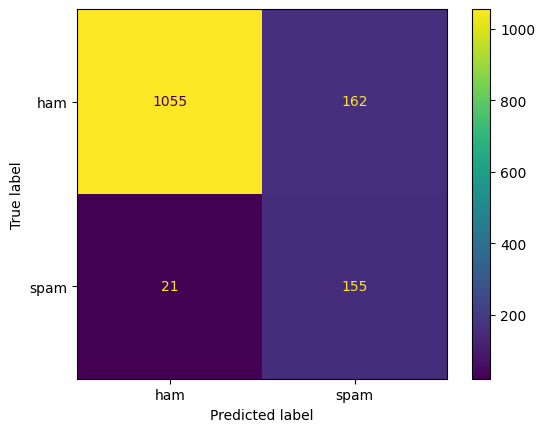

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,ypred)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

0.8686288585786073
              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1217
        spam       0.49      0.88      0.63       176

    accuracy                           0.87      1393
   macro avg       0.73      0.87      0.77      1393
weighted avg       0.92      0.87      0.88      1393



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train.toarray(),y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test.toarray())

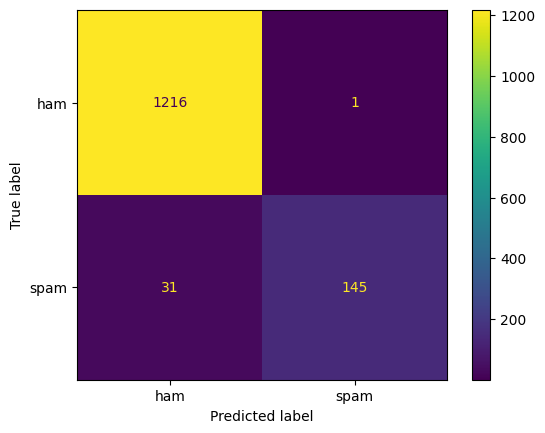

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1217
        spam       0.99      0.82      0.90       176

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
accuracy_score(y_test,y_pred)

0.9770279971284996

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.9698492462311558

In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_features' : ['sqrt','log2'],
    'random_state' : [0,1,2,3,4],
    'class_weight' : ['balanced','balanced_subsample']
}

In [ ]:
grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='accuracy')

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [ ]:
rf = grid.best_estimator_

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9791816223977028